<a href="https://colab.research.google.com/github/karnikaagarwal/experiment-4/blob/main/AIML%20Ex8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA





In [2]:
# 1. Load the Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
# Convert to DataFrame for better readability
df = pd.DataFrame(X, columns=feature_names)
print("First 5 rows of the dataset:\n", df.head())

First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# 2. Standardize the Data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [4]:
# 3. Calculate Covariance Matrix
cov_matrix = np.cov(X_standardized.T)
print("\nCovariance Matrix:\n", cov_matrix)



Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [5]:
# 4. Find Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)



Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [6]:
# 5. Choose the Number of Components
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))
print("\nExplained Variances by each component:\n", explained_variances)

# We will reduce the dataset to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)


Explained Variances by each component:
 [0.7296244541329989, 0.22850761786701754, 0.03668921889282865, 0.005178709107154905]


In [7]:
# 6. Transform the Data
print("\nTransformed Dataset (first 5 rows):\n", X_pca[:5])



Transformed Dataset (first 5 rows):
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


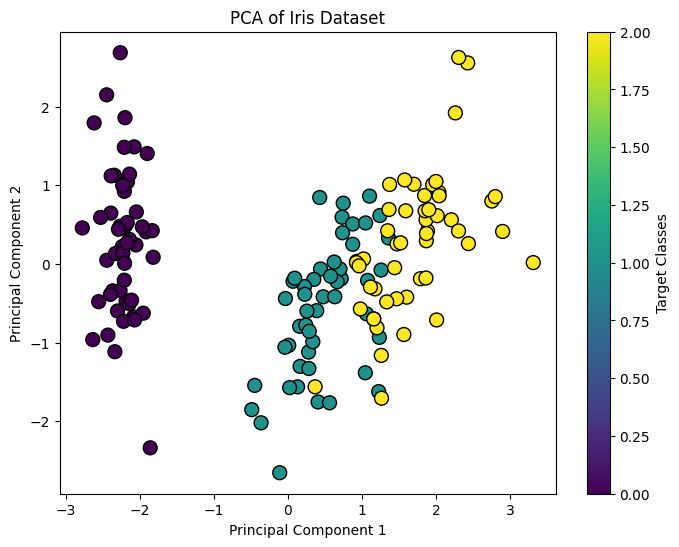

In [8]:
# 7. Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target Classes')
plt.show()


In [9]:
# Observations and Conclusion
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of components:\n", explained_variance_ratio)
total_variance = sum(explained_variance_ratio)
print(f"\nTotal Variance Explained by the 2 components: {total_variance:.2f}")




Explained Variance Ratio of components:
 [0.72962445 0.22850762]

Total Variance Explained by the 2 components: 0.96
